In [1]:
import numpy as np
from scipy import signal
import matplotlib
import matplotlib.cm as cm
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
#matplotlib.style.use('ggplot')
%load_ext autotime
#%matplotlib inline

L = 25
beta = 0.15
N_samples = 1000

x_original = np.linspace(0,L,N_samples)

# 入力信号
y_original = np.cos(beta * x_original **2)
# スケール
std = 100
# Gaussフィルターを定義
gaussian_flter = signal.gaussian(N_samples, std)
# フィルターの正規化
gaussian_flter = gaussian_flter / gaussian_flter.sum()
# 畳み込み結果を出力信号として得る
y_filtered = signal.convolve(y_original, gaussian_flter, mode='same')

#Plot
fig, (axL, axR) = plt.subplots(ncols=2, figsize=(12,4))
#Left
axL.plot(x_original, gaussian_flter, linewidth=2, color='blue')
#axL.set_title('left')
#axL.set_xlabel('x')
#axL.set_ylabel('y')
#axL.set_xlim(-np.pi, np.pi)
#axL.grid(True)
axL.axis('off')
#Right
axR.plot(x_original, y_original, linewidth=2)
axR.plot(x_original, y_filtered, linewidth=2, color='red')
#axR.set_title('right')
#axR.set_xlabel('x')
#axR.set_ylabel('y')
#axR.set_xlim(-np.pi, np.pi)
#axR.grid(True)
axR.axis('off')

fig.show()

/Users/hayashiyus/env/lib/python3.7/site-packages/ipykernel_launcher.py:48: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


<IPython.core.display.Javascript object>


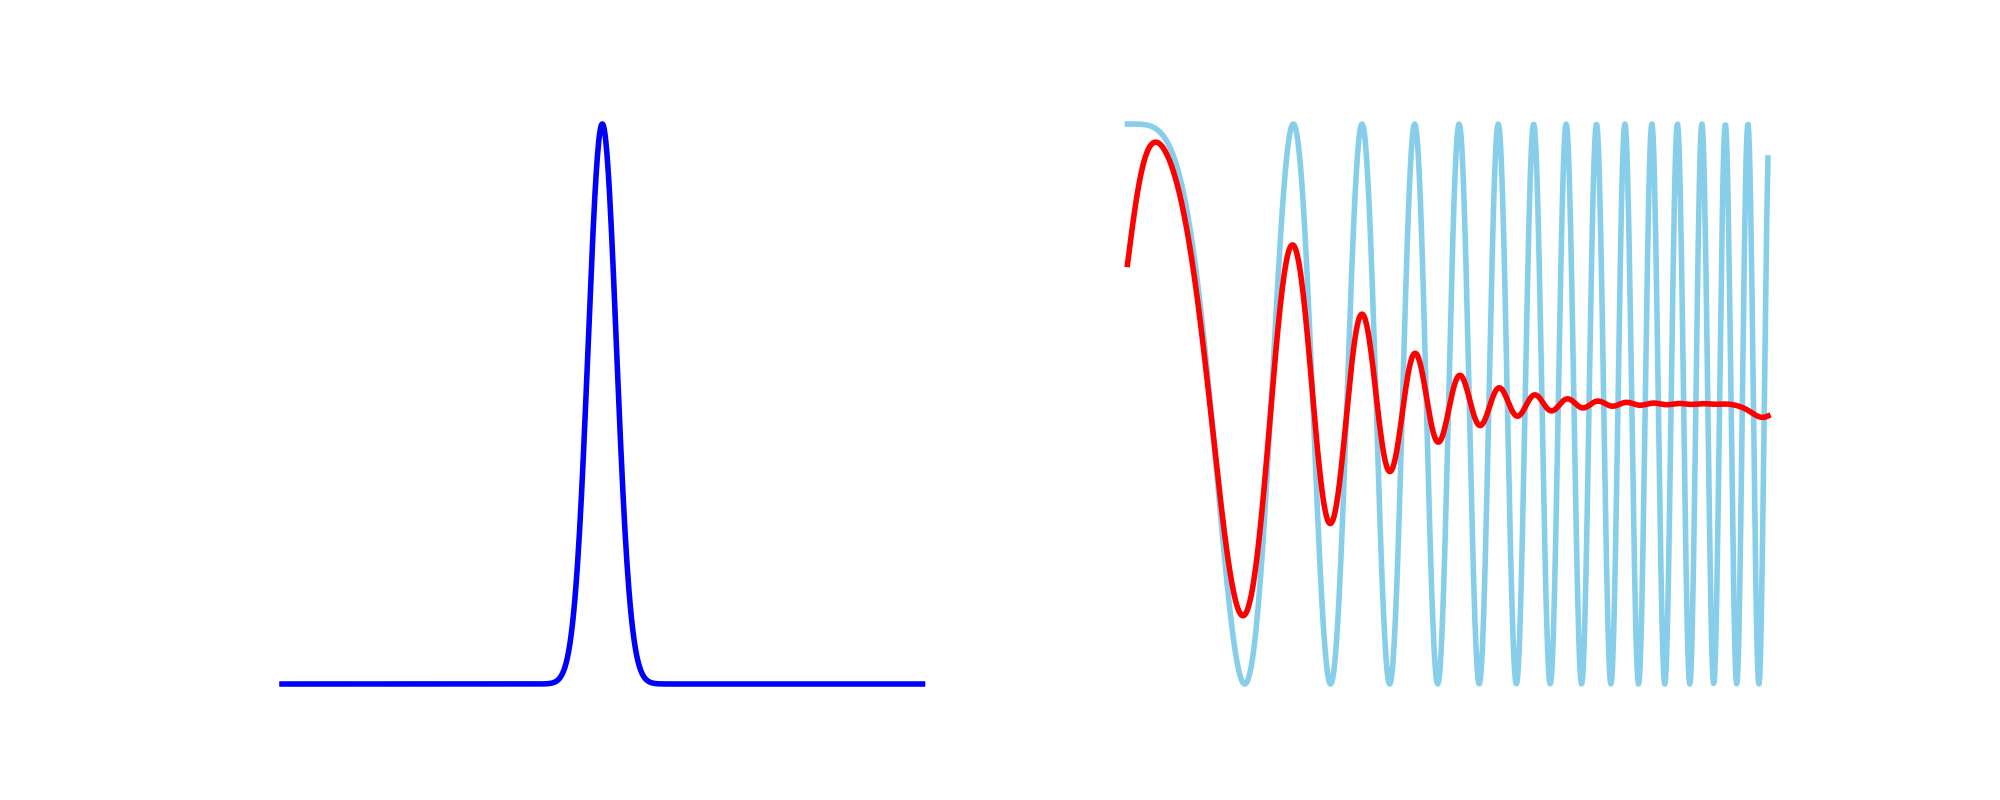

/Users/hayashiyus/env/lib/python3.7/site-packages/scipy/signal/windows/windows.py:1277: RuntimeWarning: divide by zero encountered in true_divide
  w = np.exp(-n ** 2 / sig2)
/Users/hayashiyus/env/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


time: 7.26 s


In [4]:
from matplotlib.animation import ArtistAnimation
%matplotlib nbagg

artists = []

L = 25
beta = 0.15
N_samples = 1000
x_original = np.linspace(0,L,N_samples)
y_original = np.cos(beta * x_original **2)

#Plot
fig, (axL, axR) = plt.subplots(ncols=2, figsize=(10,4))

axL.axis('off')
axR.axis('off')

for i in range(30):
    std = i
    gaussian_flter = signal.gaussian(N_samples, std)
    im1 = axL.plot(x_original, gaussian_flter, linewidth=2, color='blue')
    gaussian_flter = gaussian_flter / gaussian_flter.sum()
    y_filtered = signal.convolve(y_original, gaussian_flter, mode='same')
    im2 = axR.plot(x_original, y_original, linewidth=2, color='skyblue')
    im3 = axR.plot(x_original, y_filtered, linewidth=2, color='red')
    artists.append(im1+im2+im3) #sum of subplots images = fig image

anim = ArtistAnimation(fig, artists, interval=1000)

anim.save('anim.gif', writer='imagemagick', fps=11)
anim.save('anim.mp4', writer='ffmpeg', fps=11)

fig.show()